# Shift invariance in the DWT domain

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline
import pywt
from io_stuff import *
from color import *

### Create three images
With a circle of diameter 10 that moves from coordinate (30, 20), (30, 21), and (30, 22). (row, column)

In [2]:
%%bash
jupyter nbconvert --to notebook --execute create_moving_circles.ipynb

[NbConvertApp] Converting notebook create_moving_circles.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 86642 bytes to create_moving_circles.nbconvert.ipynb


### Load the images

In [3]:
prefix = "moving_circle_"
frame_0 = load_img(prefix + "000")
frame_1 = load_img(prefix + "001")
frame_2 = load_img(prefix + "002")

### Work only with luma

In [4]:
frame_0_Y = RGB_to_YCoCg(frame_0)[:,:,0]
frame_1_Y = RGB_to_YCoCg(frame_1)[:,:,0]
frame_2_Y = RGB_to_YCoCg(frame_2)[:,:,0]

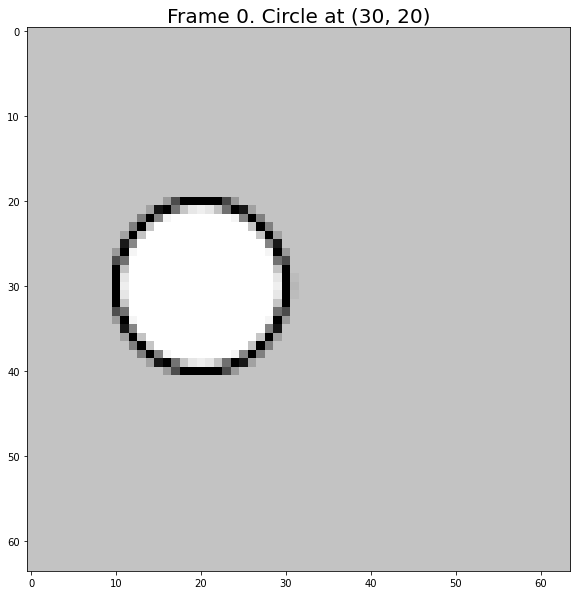

In [5]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. Circle at (30, 20)", fontsize=20)
plt.imshow(frame_0_Y, cmap='gray')
plt.savefig("frame_0_Y.png")
plt.show()

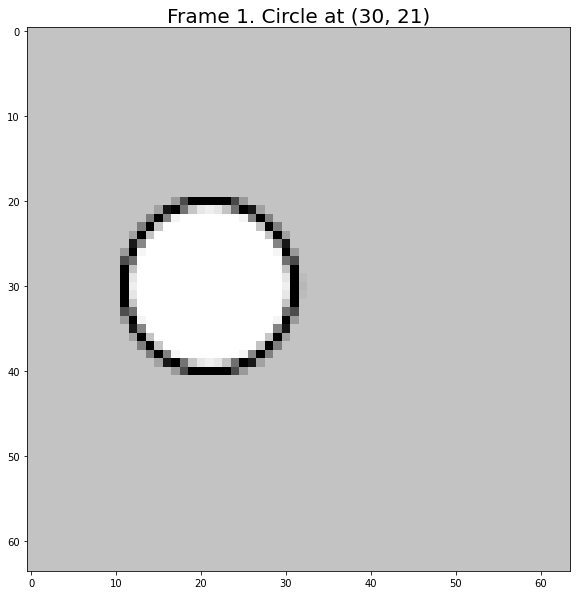

In [6]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. Circle at (30, 21)", fontsize=20)
plt.imshow(frame_1_Y, cmap='gray')
plt.savefig("frame_1_Y.png")
plt.show()

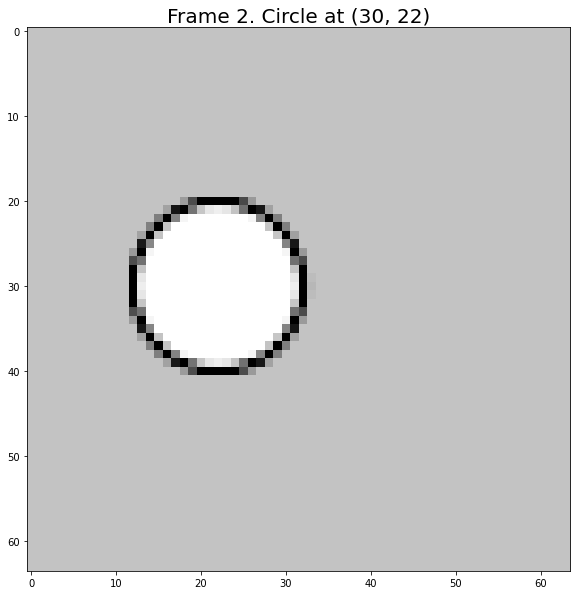

In [7]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. Circle at (30, 22)", fontsize=20)
plt.imshow(frame_2_Y, cmap='gray')
plt.savefig("frame_2_Y.png")
plt.show()

### Motion estimation (ME) in the pixel domain
Notice that this ME would be used if the original frames where available. This is not the case in MRCV!

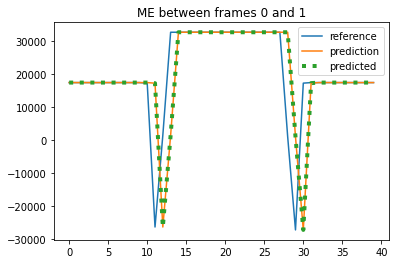

In [8]:
# Plot the first part (from pixel 0 to 39) of the horizontal line (row 35) of the luminance.
plt.title("ME between frames 0 and 1")
plt.plot(frame_0_Y[35, 0:40], label="reference")
plt.plot(np.roll(frame_0_Y[35, 0:40], 1), label="prediction")
#plt.show()
plt.plot(frame_1_Y[35, 0:40], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("movement_0.svg")
#plt.savefig("movement_0.pdf")
plt.show()

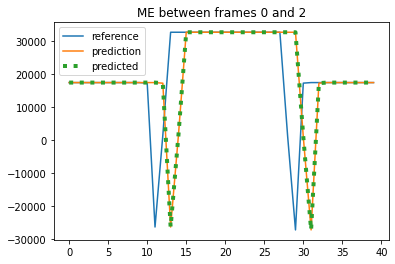

In [9]:
plt.title("ME between frames 0 and 2")
plt.plot(frame_0_Y[35, 0:40], label="reference")
plt.plot(np.roll(frame_0_Y[35, 0:40], 2), label="prediction")
#plt.show()
plt.plot(frame_2_Y[35, 0:40], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("movement_1.svg")
#plt.savefig("movement_1.pdf")
plt.show()

### Haar 2D-DWT

In [10]:
f0_haar_LL, (f0_haar_LH, f0_haar_HL, f0_haar_HH) = pywt.dwt2(frame_0_Y, 'haar')
f1_haar_LL, (f1_haar_LH, f1_haar_HL, f1_haar_HH) = pywt.dwt2(frame_1_Y, 'haar')
f2_haar_LL, (f2_haar_LH, f2_haar_HL, f2_haar_HH) = pywt.dwt2(frame_2_Y, 'haar')

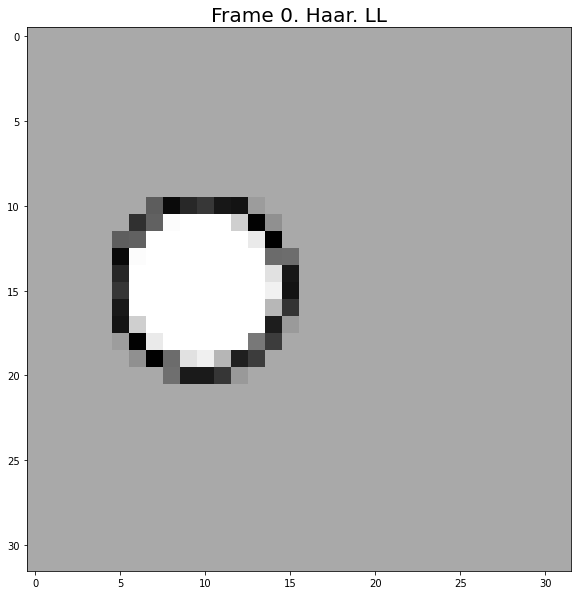

In [11]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. Haar. LL", fontsize=20)
plt.imshow(f0_haar_LL, cmap='gray')
plt.savefig('f0_haar_LL.png')
plt.show()

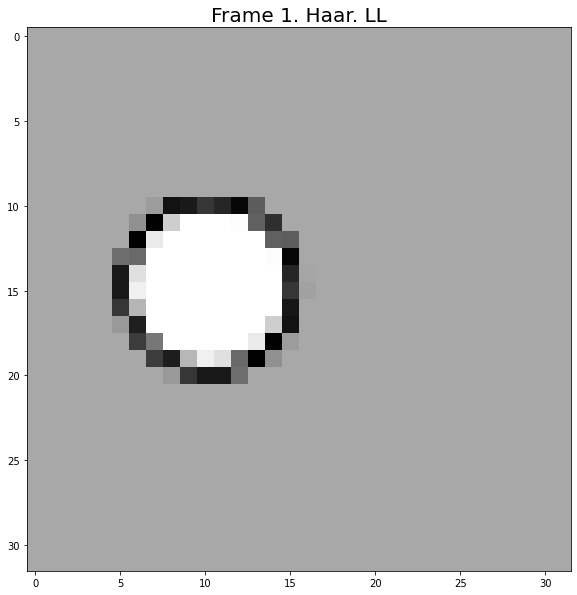

In [12]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. Haar. LL", fontsize=20)
plt.imshow(f1_haar_LL, cmap='gray')
plt.savefig('f1_haar_LL.png')
plt.show()

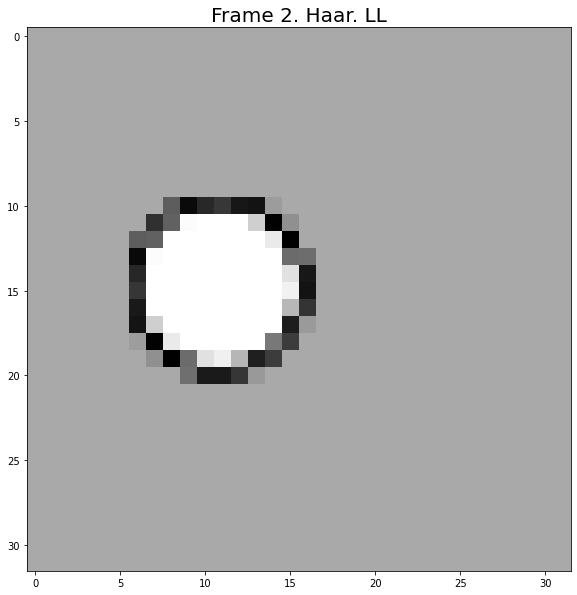

In [13]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. Haar. LL", fontsize=20)
plt.imshow(f2_haar_LL, cmap='gray')
plt.savefig('f2_haar_LL.png')
plt.show()

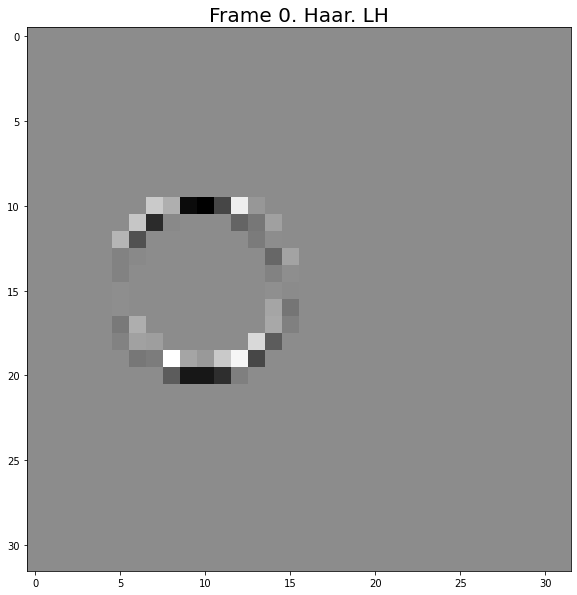

In [14]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. Haar. LH", fontsize=20)
plt.imshow(f0_haar_LH, cmap='gray')
plt.savefig('f0_haar_LH.png')
plt.show()

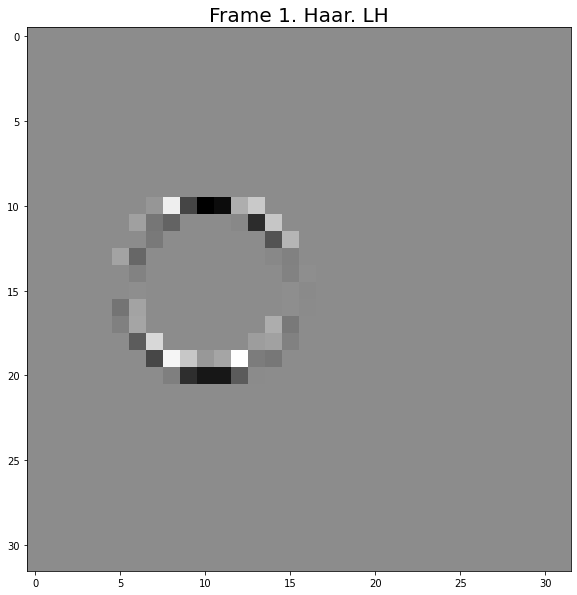

In [15]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. Haar. LH", fontsize=20)
plt.imshow(f1_haar_LH, cmap='gray')
plt.savefig('f1_haar_LH.png')
plt.show()

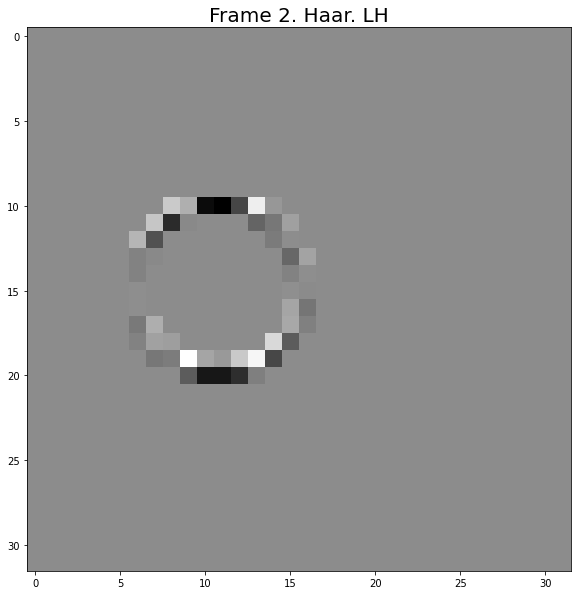

In [16]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. Haar. LH", fontsize=20)
plt.imshow(f2_haar_LH, cmap='gray')
plt.savefig('f2_haar_LH.png')
plt.show()

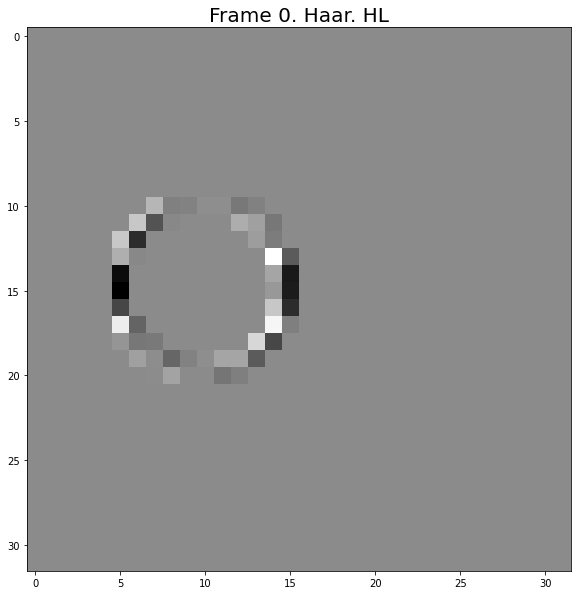

In [17]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. Haar. HL", fontsize=20)
plt.imshow(f0_haar_HL, cmap='gray')
plt.savefig('f0_haar_HL.png')
plt.show()

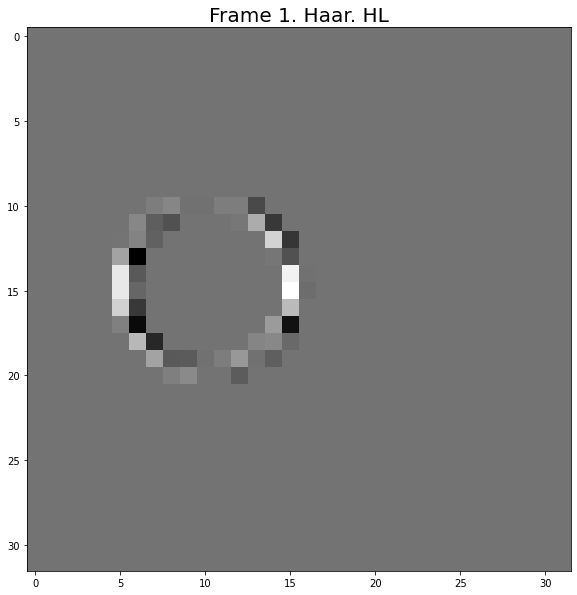

In [18]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. Haar. HL", fontsize=20)
plt.imshow(f1_haar_HL, cmap='gray')
plt.savefig('f1_haar_HL.png')
plt.show()

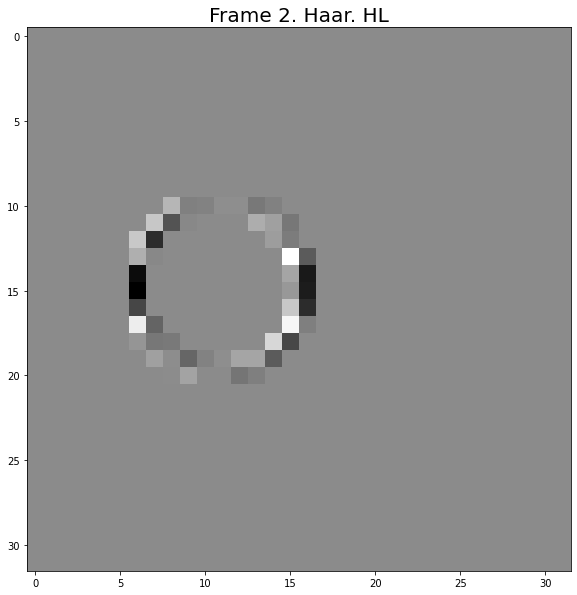

In [19]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. Haar. HL", fontsize=20)
plt.imshow(f2_haar_HL, cmap='gray')
plt.savefig('f2_haar_HL.png')
plt.show()

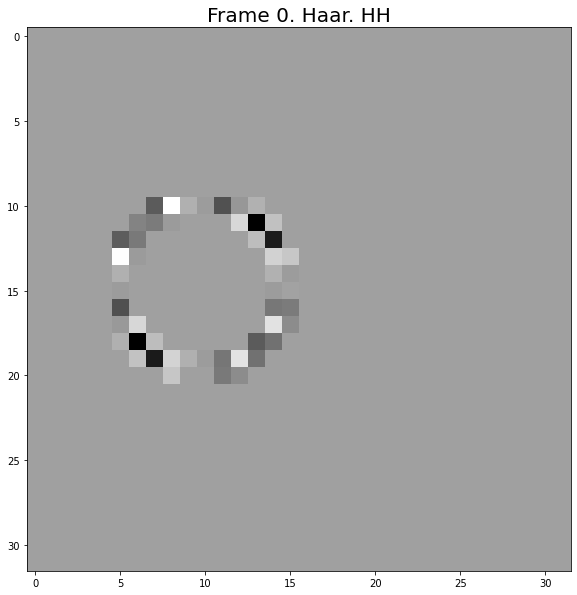

In [20]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. Haar. HH", fontsize=20)
plt.imshow(f0_haar_HH, cmap='gray')
plt.savefig('f0_haar_HH.png')
plt.show()

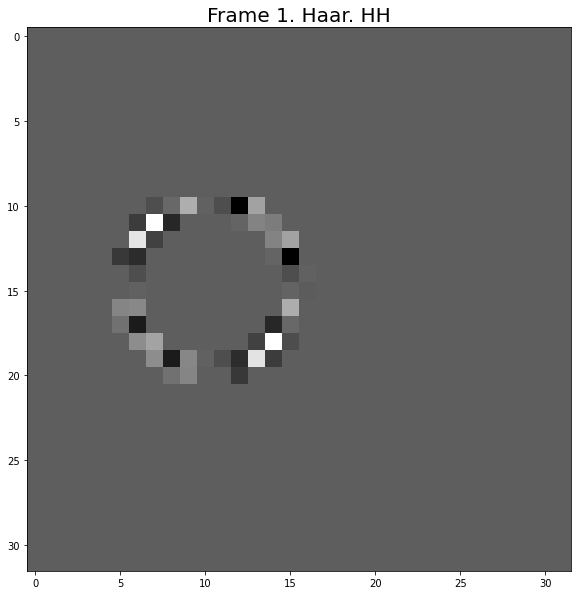

In [21]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. Haar. HH", fontsize=20)
plt.imshow(f1_haar_HH, cmap='gray')
plt.savefig('f1_haar_HH.png')
plt.show()

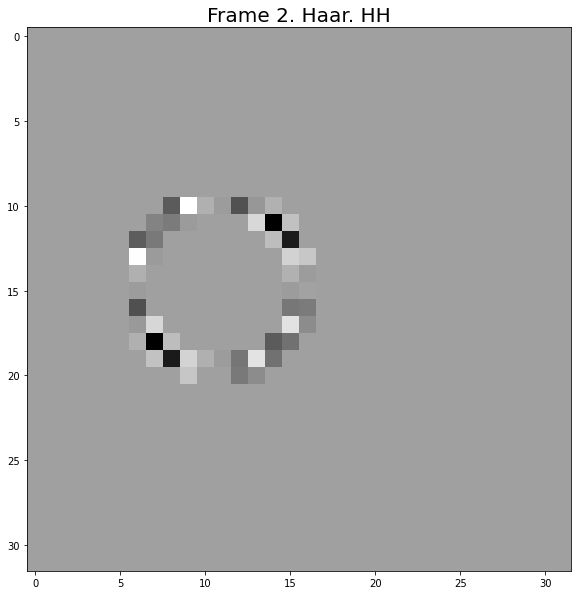

In [22]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. Haar. HH", fontsize=20)
plt.imshow(f2_haar_HH, cmap='gray')
plt.savefig('f2_haar_HH.png')
plt.show()

Notice that the coefficients of the frames 0 and 2 are identical, but this is not true for the frame 1.

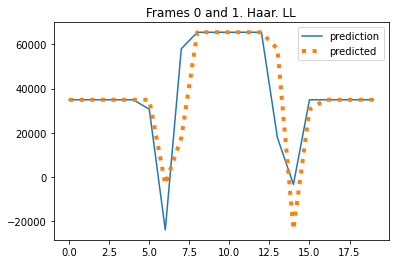

In [23]:
plt.title("Frames 0 and 1. Haar. LL")
plt.plot(np.roll(f0_haar_LL[18, 0:20], 0), label="prediction")
plt.plot(f1_haar_LL[18, 0:20], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_1_haar_LL.svg")
plt.show()

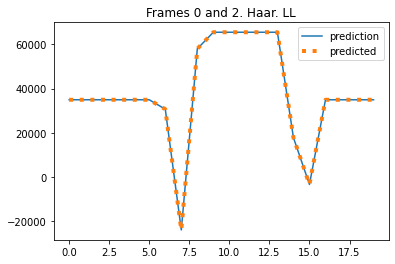

In [24]:
plt.title("Frames 0 and 2. Haar. LL")
plt.plot(np.roll(f0_haar_LL[18, 0:20], 1), label="prediction")
plt.plot(f2_haar_LL[18, 0:20], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_2_haar_LL.svg")
plt.show()

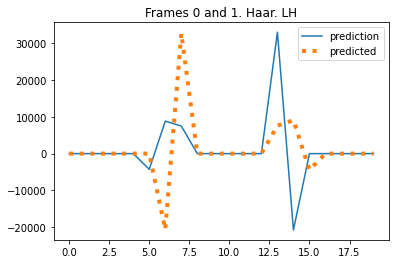

In [25]:
plt.title("Frames 0 and 1. Haar. LH")
plt.plot(np.roll(f0_haar_LH[18, 0:20], 0), label="prediction")
plt.plot(f1_haar_LH[18, 0:20], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_1_haar_LH.svg")
plt.show()

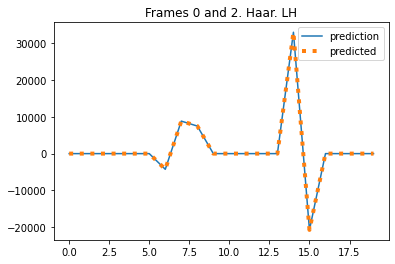

In [26]:
plt.title("Frames 0 and 2. Haar. LH")
plt.plot(np.roll(f0_haar_LH[18, 0:20], 1), label="prediction")
plt.plot(f2_haar_LH[18, 0:20], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_2_haar_LH.svg")
plt.show()

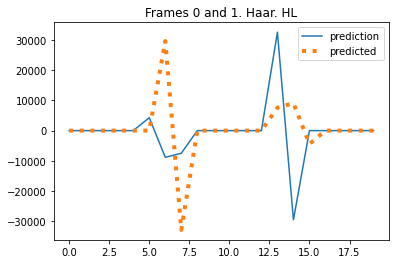

In [27]:
plt.title("Frames 0 and 1. Haar. HL")
plt.plot(np.roll(f0_haar_HL[18, 0:20], 0), label="prediction")
plt.plot(f1_haar_HL[18, 0:20], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_1_haar_HL.svg")
plt.show()

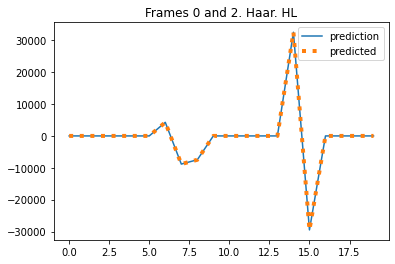

In [28]:
plt.title("Frames 0 and 2. Haar. HL")
plt.plot(np.roll(f0_haar_HL[18, 0:20], 1), label="prediction")
plt.plot(f2_haar_HL[18, 0:20], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_2_haar_HL.svg")
plt.show()

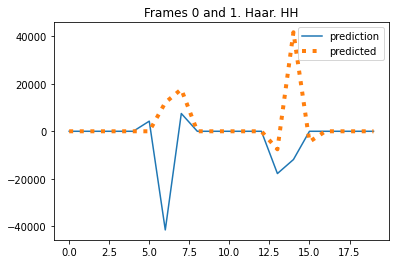

In [29]:
plt.title("Frames 0 and 1. Haar. HH")
plt.plot(np.roll(f0_haar_HH[18, 0:20], 0), label="prediction")
plt.plot(f1_haar_HH[18, 0:20], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_1_haar_HH.svg")
plt.show()

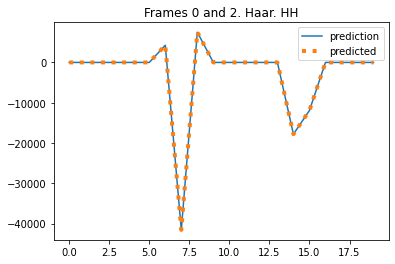

In [30]:
plt.title("Frames 0 and 2. Haar. HH")
plt.plot(np.roll(f0_haar_HH[18, 0:20], 1), label="prediction")
plt.plot(f2_haar_HH[18, 0:20], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_2_haar_HH.svg")
plt.show()

### Daubechies 5 2D-DWT 
sin acabar ...

In [31]:
decomposition_0_db5 = pywt.dwt2(frame_0_Y, 'db5')
decomposition_1_db5 = pywt.dwt2(frame_1_Y, 'db5')

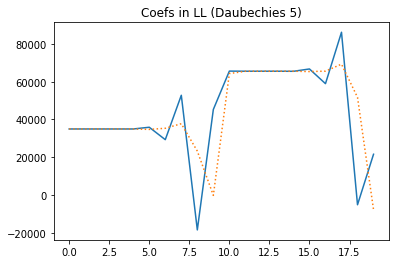

In [32]:
plt.title("Coefs in LL (Daubechies 5)")
plt.plot(decomposition_0_db5[0][18, 0:20])
plt.plot(decomposition_1_db5[0][18, 0:20], linestyle=':')
plt.savefig("db5_LL.svg")
plt.savefig("db5_LL.pdf")
plt.show()

In [33]:
decomposition_0_bior35 = pywt.dwt2(frame_0_Y, 'bior3.5')
decomposition_1_bior35 = pywt.dwt2(frame_1_Y, 'bior3.5')

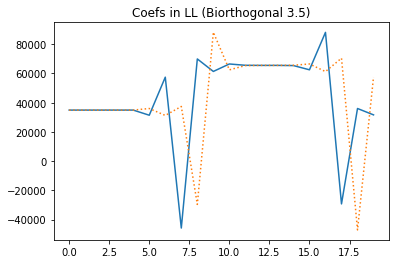

In [34]:
plt.title("Coefs in LL (Biorthogonal 3.5)")
plt.plot(decomposition_0_bior35[0][18, 0:20])
plt.plot(decomposition_1_bior35[0][18, 0:20], linestyle=':')
plt.savefig("bior35_LL.svg")
plt.savefig("bior35_LL.pdf")
plt.show()

NameError: name 'decomposition_0_haar' is not defined

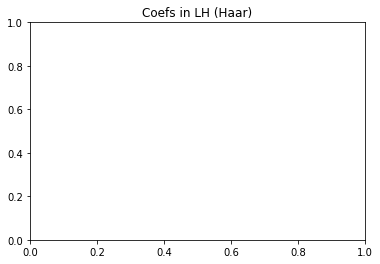

In [35]:
plt.title("Coefs in LH (Haar)")
plt.plot(decomposition_0_haar[1][0][18, 0:20])
plt.plot(decomposition_1_haar[1][0][18, 0:20], linestyle=':')
plt.savefig("haar_LH.svg")
plt.savefig("haar_LH.pdf")
plt.show()

In [ ]:
plt.title("Coefs in LH (Daubechines 5)")
plt.plot(decomposition_0_db5[1][0][18, 0:20])
plt.plot(decomposition_1_db5[1][0][18, 0:20], linestyle=':')
plt.savefig("db5_LH.svg")
plt.savefig("db5_LH.pdf")
plt.show()

In [ ]:
plt.title("Coefs in LH (Biorthogonal 3.5)")
plt.plot(decomposition_0_bior35[1][0][18, 0:20])
plt.plot(decomposition_1_bior35[1][0][18, 0:20], linestyle=':')
plt.savefig("bior35_LH.svg")
plt.savefig("bior35_LH.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HL (Haar)")
plt.plot(decomposition_0_haar[1][1][18, 0:20])
plt.plot(decomposition_1_haar[1][1][18, 0:20], linestyle=':')
plt.savefig("haar_HL.svg")
plt.savefig("haar_HL.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HL (Daubechines 5)")
plt.plot(decomposition_0_db5[1][1][18, 0:20])
plt.plot(decomposition_1_db5[1][1][18, 0:20], linestyle=':')
plt.savefig("db5_HL.svg")
plt.savefig("db5_HL.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HL (Biorthogonal 3.5)")
plt.plot(decomposition_0_bior35[1][1][18, 0:20])
plt.plot(decomposition_1_bior35[1][1][18, 0:20], linestyle=':')
plt.savefig("bior35_HL.svg")
plt.savefig("bior35_HL.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HH (Haar)")
plt.plot(decomposition_0_haar[1][2][18, 0:20])
plt.plot(decomposition_1_haar[1][2][18, 0:20], linestyle=':')
plt.savefig("haar_HH.svg")
plt.savefig("haar_HH.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HH (Daubechines 5)")
plt.plot(decomposition_0_db5[1][2][18, 0:20])
plt.plot(decomposition_1_db5[1][2][18, 0:20], linestyle=':')
plt.savefig("db5_HH.svg")
plt.savefig("db5_HH.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HH (Biorthogonal 3.5)")
plt.plot(decomposition_0_bior35[1][2][18, 0:20])
plt.plot(decomposition_1_bior35[1][2][18, 0:20], linestyle=':')
plt.savefig("bior35_HH.svg")
plt.savefig("bior35_HH.pdf")
plt.show()